# Network Analytics

In [14]:
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 18})

In [15]:
# Import custom class
%run '../src/helper/netwrk.py'

In [16]:
nwk = Network()  # Instantiate the class

# Load network data

In [17]:
df = pd.read_csv('../data/network_data.csv', sep = '\t')
df.arXiv_id = df['arXiv_id'].astype(str) # convert to string
df.dropna(inplace = True)
df = df[df.year >= 2010] # from 2010
print('Data size', df.shape)
df.head(10)

Data size (755306, 5)


,arXiv_id,author,rsp,year,length_auth
1,1210.0809,SiQ,1,2012,3
3,1303.0224,YuX,1,2013,3
9,2001.01247,LiS,1,2020,3
11,1507.07885,YuG,1,2015,3
13,1512.03368,WuS,1,2015,3
14,1907.05956,XuG,1,2019,3
15,1906.06888,HuJ,1,2019,3
16,1207.6291,LiW,1,2012,3
18,1704.00827,HuW,1,2017,3
19,1601.07408,LiG,1,2016,3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755306 entries, 1 to 1127459
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   arXiv_id     755306 non-null  object
 1   author       755306 non-null  object
 2   rsp          755306 non-null  int64 
 3   year         755306 non-null  int64 
 4   length_auth  755306 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 34.6+ MB


# Bipartite Network Analytics

In [19]:
# Construct bipartite network
G, paper_nodes, author_nodes = nwk.bigraph(df, 'arXiv_id', 'author', 'rsp')

In [20]:
# Network info
nwk.binet_info(G, paper_nodes, author_nodes)

Total papers: 176494
Total authors: 196867
Average authors per paper: 4.2776
Average papers per author: 3.8349
-----------------------------------
Bipartite network: True
Connected: False
Clustering coefficient: 0.1213
Density: 2.2e-05
-----------------------------------
Name: 
Type: Graph
Number of nodes: 373361
Number of edges: 754969
Average degree:   4.0442


In [21]:
# Display network in two layouts
# nwk.plot_bigraph(G, paper_nodes, author_nodes, title = None)

# Bipartite degree distribution

In [22]:
author_dgr, author_dgr_proba = nwk.bidegree_dist(G, author_nodes)
paper_dgr, paper_dgr_proba = nwk.bidegree_dist(G, paper_nodes)

In [23]:
author_dgr = author_dgr.sort_values(by = 'dgr', ascending = False).reset_index(drop = True)
author_dgr.columns = ['author', '# of papers']
author_dgr.head(10)

,author,# of papers
0,TaniguchiTakashi,851
1,WatanabeKenji,833
2,WangX,304
3,SarmaS,277
4,PeetersF,253
5,LossDaniel,225
6,WangZ,222
7,FelserClaudia,214
8,KatsnelsonM,211
9,WestK,204


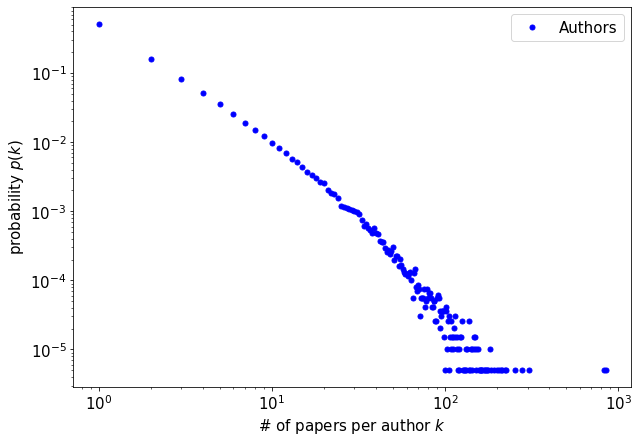

In [24]:
nwk.plot_dgr_dist(author_dgr_proba, xlab = r'# of papers per author $k$', 
                  title = None, label = 'Authors')

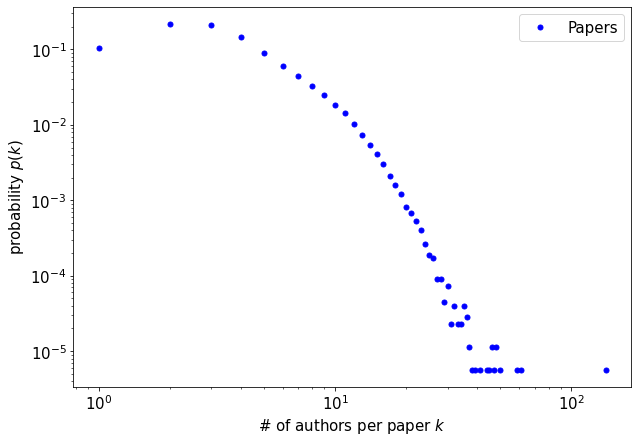

In [25]:
nwk.plot_dgr_dist(paper_dgr_proba, xlab = r'# of authors per paper $k$', 
                  title = None, label = 'Papers')

# A. Projection: Author-Author Network

In [26]:
aG = nwk.projected_bigraph(G, author_nodes)

In [27]:
author_dgr_, author_dgr_proba_ = nwk.degree_dist(aG)

In [28]:
author_dgr_ = author_dgr_.sort_values(by = 'dgr', ascending = False).reset_index(drop = True)
author_dgr_.columns = ['author', '# of collaborators']
author_dgr_.head(10)

,author,# of collaborators
0,TaniguchiTakashi,3526
1,WatanabeKenji,3480
2,WangX,1113
3,WangY,984
4,WangZ,917
5,ChenY,886
6,ChenX,861
7,KimJ,847
8,GuG,771
9,ZhangJ,767


No handles with labels found to put in legend.


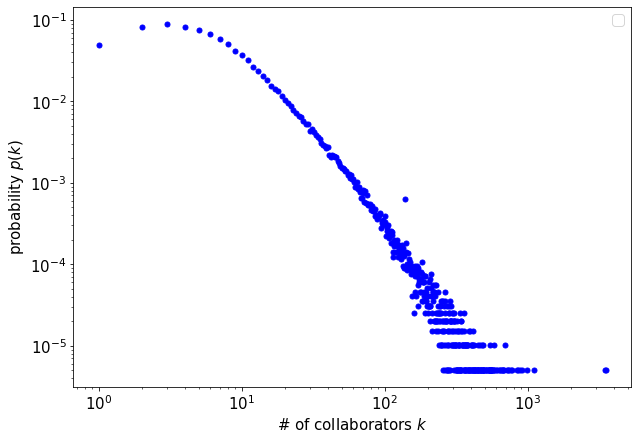

In [29]:
nwk.plot_dgr_dist(author_dgr_proba_, xlab = r'# of collaborators $k$', 
                  title = None, label = None)

# B. Projection: Paper-Paper Network

In [30]:
pG = nwk.projected_bigraph(G, paper_nodes)

In [31]:
paper_dgr_, paper_dgr_proba_ = nwk.degree_dist(pG)
paper_dgr_proba_.head()

,dgr,dgr_proba
0,0,0.023542
1,1,0.020533
2,2,0.019428
3,3,0.018743
4,4,0.018018


No handles with labels found to put in legend.


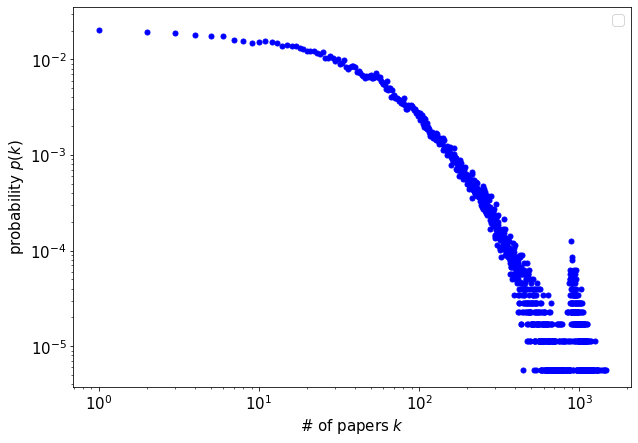

In [32]:
nwk.plot_dgr_dist(paper_dgr_proba_, xlab = r'# of papers $k$', 
                  title = None, label = None)